In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Output File (CSV)
output_data_file = "output_data_file/mars_temp.csv"

In [3]:
# Set variable with url to be scrapped
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [4]:
# Read in url using pandas and set the list to a tables variable
tables = pd.read_html(url)


In [5]:
# Set the first tables in the tables list as a dataframe
mars_temp_df = tables[0]
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
# Print data types
print(mars_temp_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [7]:
# Convert terrestrial_date column to data type datetime
mars_temp_df["terrestrial_date"] = pd.to_datetime(mars_temp_df["terrestrial_date"])

In [8]:
# Check data type has changed
print(mars_temp_df.dtypes.terrestrial_date)


datetime64[ns]


# Calc to be used in the following questions

In [9]:
# group dataframe by month DATA to be used for the questions
mars_temp_group_month = mars_temp_df.groupby("month")

# 1. How many months exist on Mars?

In [10]:
# count how many unique months there is in the dataframe
no_months = len(mars_temp_df["month"].unique())

# Print result
print(f"There is {no_months} months on Mars")

There is 12 months on Mars


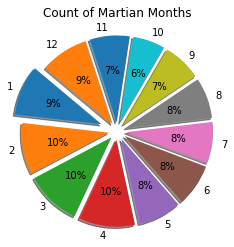

In [11]:
# Plot how many times the month comes up in the data set
month_counts = mars_temp_group_month.sol.count()

# Labels for the sections of our pie chart
month_label = mars_temp_df["month"].unique()
month_label.sort()

tup_explode = (0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(month_counts, explode=tup_explode, shadow=True, startangle=140, labels=month_label, autopct="%1.0f%%")

# Add title
plt.title("Count of Martian Months")

plt.show()


# 2. How many Martian (and not Earth) days' worth of data exist in the scraped dataset?

In [12]:
# count how many unique days there is in the dataframe
no_days = len(mars_temp_df["sol"].unique())

# Print result
print(f"There is {no_days} Martian days worth of data in scraped dataset")

There is 1867 Martian days worth of data in scraped dataset


# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

In [13]:
# store the mean values of min_temp to new variable
mean_temp_by_month = mars_temp_group_month.mean()["min_temp"]

# Grab max and min of the mean min_temp by month and store them as variables
temp_min = mean_temp_by_month.min()
temp_max = mean_temp_by_month.max()

# using the min and max values find the month related to that value
temp_min_month = mean_temp_by_month[mean_temp_by_month == temp_min].index[0]
temp_max_month = mean_temp_by_month[mean_temp_by_month == temp_max].index[0]

# Print result
print(f"The month with the coldest average minimum temperature is month {temp_min_month} with a temperature of {temp_min: .2f}")
print(f"The month with the warmest average minimum temperature is month {temp_max_month} with a temperature of {temp_max: .2f}")

The month with the coldest average minimum temperature is month 3 with a temperature of -83.31
The month with the warmest average minimum temperature is month 8 with a temperature of -68.38


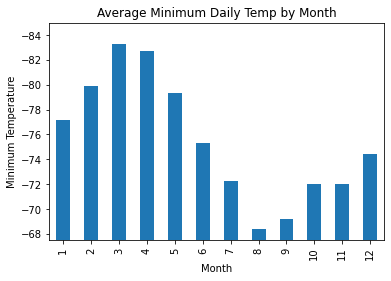

In [14]:
# Plot the results as a bar chart.
mean_temp_by_month.plot(kind='bar')

# set axis label
plt.ylabel("Minimum Temperature")
plt.xlabel("Month")

# Set y axis visible range
plt.ylim(-67.5, -85)

# Set title
plt.title("Average Minimum Daily Temp by Month")

plt.show()

# 4. Which months have the lowest and the highest atmospheric pressure on Mars?

In [15]:
# store the mean values of pressure to new variable
mean_pressure_by_month = mars_temp_group_month.mean()["pressure"]

# Grab max and min of the mean pressure by month and store them as variables
pressure_min = mean_pressure_by_month.min()
pressure_max = mean_pressure_by_month.max()

# using the min and max values find the month related to that value
pressure_min_month = mean_pressure_by_month[mean_pressure_by_month == pressure_min].index[0]
pressure_max_month = mean_pressure_by_month[mean_pressure_by_month == pressure_max].index[0]

# Print result
print(f"The month with the lowest average atmospheric pressure on Mars is month {pressure_min_month} with a pressure of {pressure_min: .2f}")
print(f"The month with the highest average atmospheric pressure on Mars is month {pressure_max_month} with a pressure of {pressure_max: .2f}")

The month with the lowest average atmospheric pressure on Mars is month 6 with a pressure of  745.05
The month with the highest average atmospheric pressure on Mars is month 9 with a pressure of  913.31


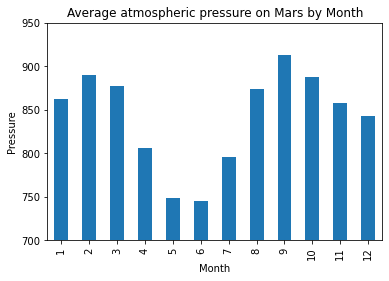

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
mean_pressure_by_month.plot(kind='bar')

# set axis label
plt.ylabel("Pressure")
plt.xlabel("Month")

# Set y axis visible range
plt.ylim(700, 950)

# Set title
plt.title("Average atmospheric pressure on Mars by Month")

plt.show()

# 5. About how many terrestrial (Earth) days exist in a Martian year?

In [17]:
# Set variables to be used in for loop to trigger when to grab date data
find_first_1 = False
find_first_2 = False
find_second_1 = False

In [18]:
# Iterate through the mars_temp_df to grab earth dates when month 1 first apprears and when month 12 ends

for row in mars_temp_df.index:

    # Find first time month == 1 and grab the earth date
    if find_first_1 == False:

        if mars_temp_df.loc[row, "month"] == 1:
            start_date = mars_temp_df.loc[row, "terrestrial_date"]
            find_first_1 = True
            start_date_index = row
            
    # Find when we can start lookin for the next first month 1
    elif (find_first_1 == True) & (find_first_2 == False):
        
        if mars_temp_df.loc[row, "month"] == 2:
            find_first_2 = True
    
    # Find the next first month 1 which will give us he earth days start and end dates
    elif find_second_1 == False:
        
        if mars_temp_df.loc[row, "month"] == 1:
            end_date = mars_temp_df.loc[(row-1), "terrestrial_date"]
            find_second_1 = True
            end_date_index = row-1

In [19]:
# Using the start and end dates we can subtract the two and get the total number of days for 1 Martian year
total_days = (end_date - start_date).days

# Print the outcome
print(f"There is approximately {total_days} terrestrial (Earth) days that exist in a Martian year")


There is approximately 686 terrestrial (Earth) days that exist in a Martian year


In [20]:
# Create new dataframe that only holds the data for 1 Martian year only grabbing the date and min temp
year_min_temp_df = mars_temp_df[start_date_index: end_date_index][["terrestrial_date","min_temp"]].set_index('terrestrial_date')

# Set the index to a string value to be used as x axis ticks
year_min_temp_df.index = year_min_temp_df.index.astype(str)


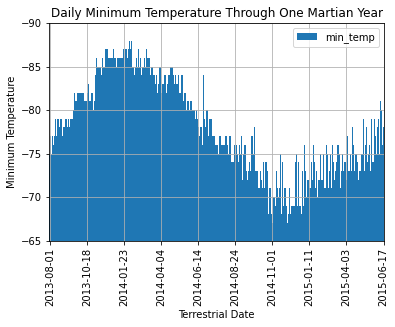

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
year_min_temp_df.plot(y="min_temp", kind="bar", rot=90, fontsize=10, grid=True, width=2)

# Set tick locations every 68.8 
tick_locations = np.arange(0, len(year_min_temp_df), 68.8)

# Grab xtick values
x_ticks = year_min_temp_df.iloc[tick_locations,:0]

# Grab xtick values
plt.xticks(tick_locations, x_ticks.index.values)

# Set y axis visible range
plt.ylim(-65, -90)

# set axis label
plt.ylabel("Minimum Temperature")
plt.xlabel("Terrestrial Date")

plt.title("Daily Minimum Temperature Through One Martian Year")

plt.show()

# Export the DataFrame to a CSV file.

In [22]:
# Save df as a csv file
mars_temp_df.to_csv(output_data_file)